Assignment 2, Part 1:
List of the atomic weights of the first 6 elements of the perioic table rounded to the nearest integer.

In [4]:
weights = [1, 4, 7, 9, 11, 12]

In [5]:
import matplotlib.pyplot as plt

Creating (2) pie charts as follows: 
1. each slice annotated with a percentage of the whole
2. each slice annotated with its atomic weight

<function matplotlib.pyplot.show(close=None, block=None)>

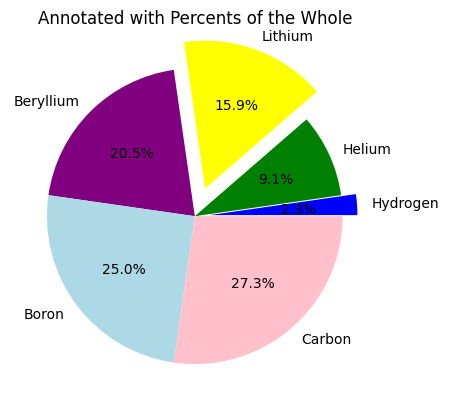

In [6]:
colors = ['blue', 'green', 'yellow', 'purple', 'lightblue', 'pink']
labels = ['Hydrogen', 'Helium', 'Lithium', 'Beryllium', 'Boron', 'Carbon']
explode = [0.1, 0, 0.2, 0, 0, 0]
plt.pie(weights, labels = labels, colors = colors, explode = explode, autopct='%.1f%%')
plt.title("Annotated with Percents of the Whole")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

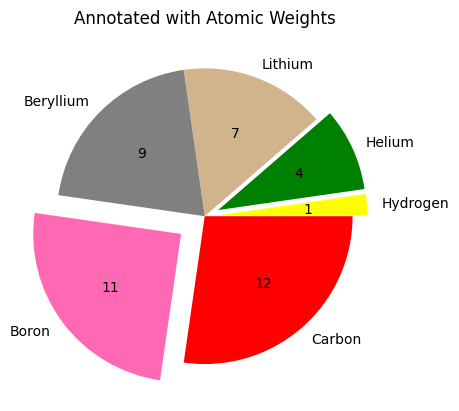

In [8]:
colors = ['yellow', 'green', 'tan', 'gray', 'hotpink', 'red']
explode = [0.1, 0.1, 0, 0, 0.2, 0]
labels = ['Hydrogen', 'Helium', 'Lithium', 'Beryllium', 'Boron', 'Carbon']
plt.pie(weights, labels = labels, explode = explode, colors = colors, autopct = lambda p: '{:.0f}' .format(p * sum(weights) / 100.0))
plt.title("Annotated with Atomic Weights")
plt.show

Assignment 2, Part 2:
Read in a df py_ide2.csv and provide both a horizontal bar chart and a vertical bar chart, complete with all labels. Be sure to rotate the IDE names so that they are readable.

In [35]:
import pandas as pd
data = pd.read_csv('py_ide2.csv')
print(data)

             IDE  Adoption
0        Jupyter      57.0
1        PyCharm      35.0
2         Spyder      27.0
3        VS Code      21.0
4   Sublime Text      12.0
5           Atom      10.0
6            Vim       8.5
7    another IDE       3.1
8        Eclipse       3.0
9     another ed       2.5
10         Emacs       2.2
11         gedit       1.3
12         Rodeo       1.2


<function matplotlib.pyplot.show(close=None, block=None)>

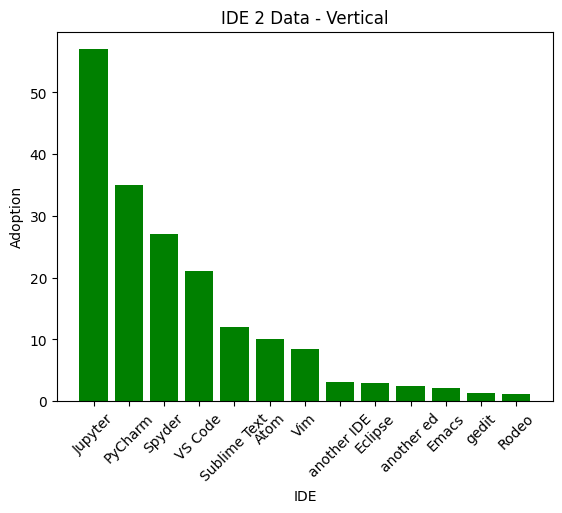

In [45]:
df = pd.DataFrame(data)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

plt.bar(X, Y, color = 'g')
plt.title("IDE 2 Data - Vertical")
plt.xlabel("IDE")
plt.ylabel("Adoption")

plt.xticks(rotation = 45)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

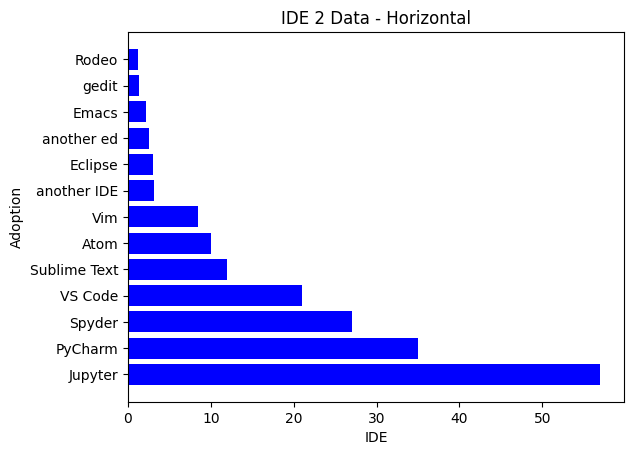

In [46]:
df = pd.DataFrame(data)

plt.barh(X, Y, color = 'b')
plt.ylabel('Adoption')
plt.xlabel('IDE')
plt.title("IDE 2 Data - Horizontal")

plt.show

Assignment 2, Part 3:
Construct a list of eight strings that represent days evenly spread out. Drawing from the random uniform distribution, make an array of eight floats ranging from 100 to 200 in value. Establish a DataFrame from that list and that array, convert the dates to pandas datetime objects, and set them to the index. Make two charts in the same window or canvas as follows: (1) a line plot of the values vs. dates and (2) a bar chart of the same.

In [50]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

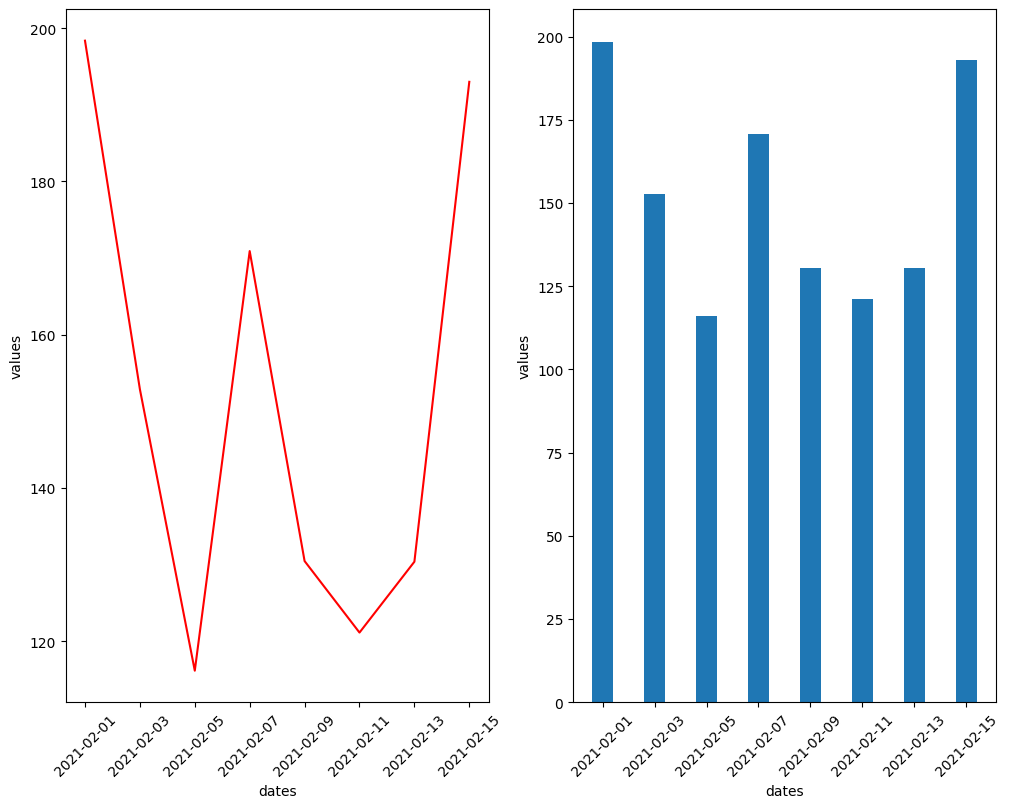

In [51]:
import matplotlib.pyplot as plt
days = ['2021-02-01', '2021-02-03', '2021-02-05', '2021-02-07', '2021-02-09', '2021-02-11', '2021-02-13', '2021-02-15']

#np.random.seed(51)
values = np.random.uniform(100, 201, 8)

df = pd.DataFrame({'days': days, 'values' : values})
df['days'] = pd.to_datetime(df['days'])
df.set_index('days', inplace = True)

fig, axs = plt.subplots (1, 2, figsize=(12, 9))

axs[0].plot(df['values'], c='r')
axs[0].set_xlabel('dates')
axs[0].set_ylabel('values')
axs[0].set_xticks(df.index.date)

axs[0].set_xticklabels(df.index.date, rotation = 45)
axs[1].bar(df.index, df['values'])
axs[1].set_xlabel('dates')
axs[1].set_ylabel('values')
axs[1].set_xticks(df.index.date)
axs[1].set_xticklabels(df.index.date, rotation = 45)

plt.tight_layout


Assignment 2, Part 4: 
Pull from Yahoo! Finance the closing prices and volumes of the stock of your choice over the trading days of one month, and plot the prices and volumes on a canvas in two separate panels, one above the other, with the dates aligned.

In [45]:
import pandas as np
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objs as go
%matplotlib inline
import yfinance

[*********************100%***********************]  1 of 1 completed


Text(0.5, 0.98, 'Coinbase Matrics + Volumes from 12/2022')

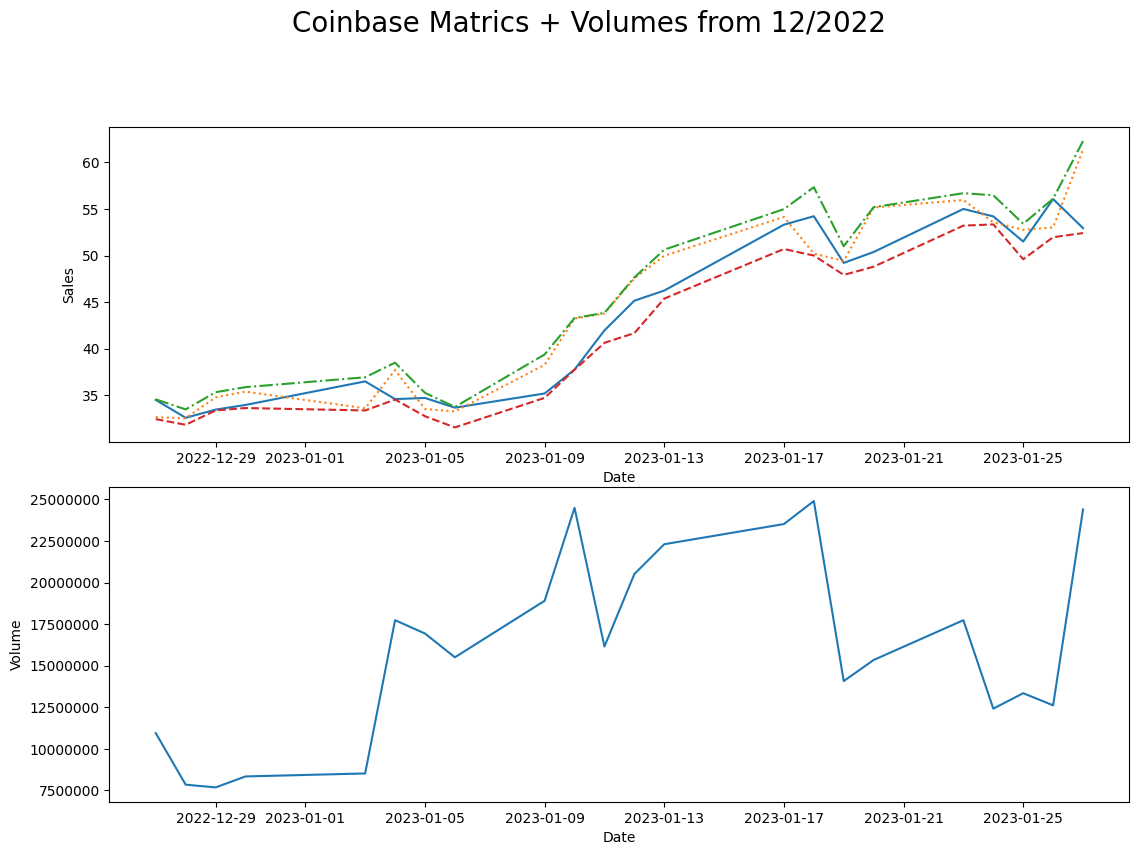

In [47]:
df = yfinance.download('COIN', '2022-12-26', '2023-12-26')

fig = plt.figure(figsize = (12, 9), num = 24)

ax0 = fig.add_axes([0.1, 0.50, 0.85, 0.35])
ax1 = fig.add_axes([0.1, 0.1, 0.85, 0.35], sharex = ax0)

for i, j in zip(['Open', 'Close', 'High', 'Low'], ['-', ':', '-.', '--']):
    ax0.plot(i, data = df, linestyle = j)

ax0.yaxis.get_major_formatter().set_scientific(False)
ax0.set_xlabel('Date')
ax0.set_ylabel('Sales')
ax0.legend

ax1.plot('Volume', data = df)
ax1.yaxis.get_major_formatter().set_scientific(False)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume')

fig.suptitle('Coinbase Matrics + Volumes from 12/2022', fontsize = 20)